In [1]:
%matplotlib inline
import os
from sklearn.neighbors import KDTree
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
import subprocess
import physt
from string import ascii_uppercase
#path='/home/ebeyerle/Desktop/UBQN/400ns-low-freq/preaveraged/full/'
#savepath='/home/ebeyerle/Desktop/UBQN/400ns-low-freq/preaveraged/full/'

path='../'
savepath=path
#savepath='/home/ebeyerle/Desktop/UBQN/400ns-low-freq/'

# Preliminaries:

In [2]:
counter=0
with open(path + 'protname.txt') as f:
    for line in f:
        p=line.split()
        if counter == 0:
            protname=str(p[0])
        if counter == 1:
            nres=int(p[0])
        if counter == 2:
            nfrs=int(p[0])
        if counter == 3:
            natoms=int(p[0])
        counter=counter+1
print(protname,nres,nfrs,natoms)   
#traj=np.loadtxt(path + 'unformatted_coords')
traj=np.load('../PCA/unformatted_traj.npy')
#np.save(path + 'unformatted_coords.npy')
print(traj.shape)
nfrs = traj.shape[1]

1UBQ 76 5000000 1231
(228, 5000000)


In [3]:
#Write dictionaries from top.pdb file

subprocess.call("grep 'ATOM' " + path +"top.pdb | grep 'CA' | awk '{ print $3 }' > " + path + "atom_dict", shell = True)
subprocess.call("grep 'ATOM' " + path +"top.pdb | grep 'CA' | awk '{ print $4 }' > " + path + "res_dict", shell = True)
subprocess.call("grep 'ATOM' " + path +"top.pdb | grep 'CA' | awk '{ print $11 }' > " + path + "as_dict", shell = True)

atom_dict = np.loadtxt(path + "atom_dict", dtype = str)
res_dict = np.loadtxt(path + "res_dict", dtype = str)
as_dict = np.loadtxt(path + "as_dict", dtype = str)

In [4]:
avg_coor = traj.mean(1)
dummy = np.zeros((len(avg_coor) // 3, 3))

for i, n in enumerate(range(0, len(avg_coor), 3)):
    dummy[i, 0] = avg_coor[n]
    dummy[i, 1] = avg_coor[n+1]
    dummy[i, 2] = avg_coor[n+2]
    
avg_coor = dummy

../mode75/
Radial Bins:  1


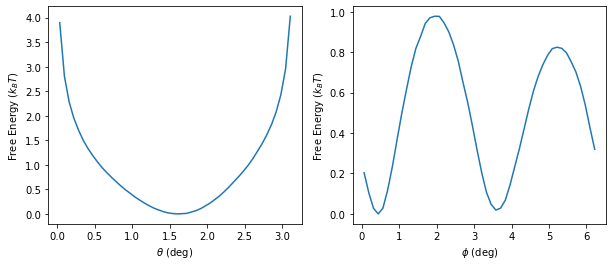

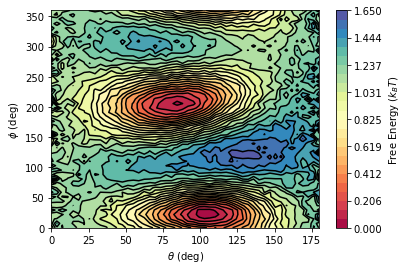

0
1
2
3
4
5
6
7
8
9
10


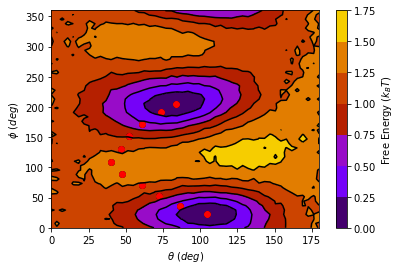

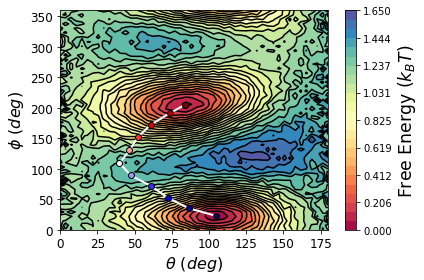

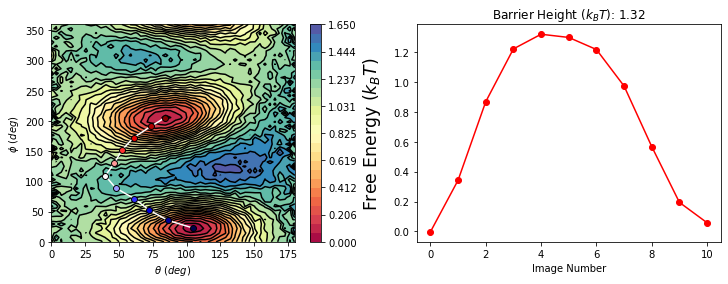

1
2
3
4
5
6
7
8
9
10
11
[ 22.92516442  25.26369341  26.95470121  29.35778087  32.69746578
  35.44854189  37.95538909  40.92903786  44.4666101   48.42173396
  52.45735478  56.26785461  59.57411032  63.19280774  67.28414839
  71.60873063  75.47833473  79.00032081  82.61203859  85.76353679
  89.23201739  92.90840583  97.23026923 101.04362888 105.03075031
 109.46965393 113.61161505 117.36857174 121.32262221 125.76163798
 130.24258751 134.72200465 139.11260665 143.38379819 147.57417789
 151.85333157 156.10329629 160.20506483 164.1693825  168.32376547
 172.50238347 176.43521722 180.247872   183.92882245 187.42154233
 191.01566348 194.86527955 198.69773072 202.07771217 205.440079  ]
[104.57503394 100.74433524  96.58741195  92.8017118   89.80670882
  86.25996371  82.53801284  79.17944165  76.42018774  74.29642683
  72.33159312  69.96515564  66.92945554  64.2777712   62.434134
  61.24801983  58.97401464  56.19003663  53.52469275  50.3275556
  47.4771925   44.90148828  43.68632357  41.317015    

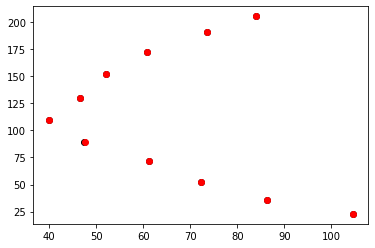

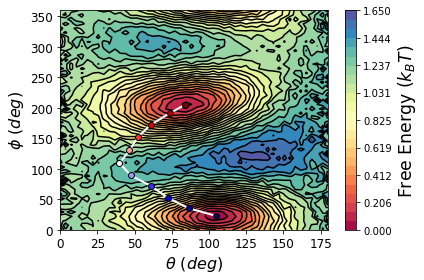

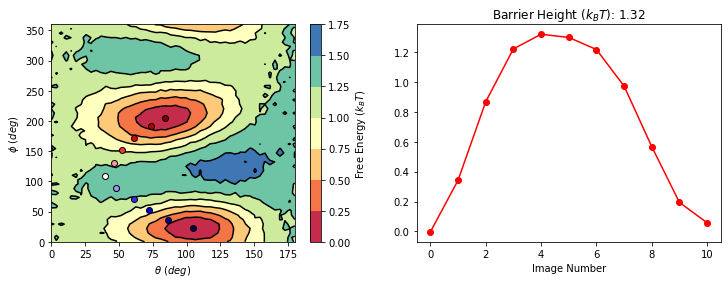

1
2
3
4
5
6
7
8
9
10
11


In [9]:
#Need to run this cell!
%matplotlib inline
import os
from sklearn.neighbors import KDTree
bins=50
xx,yy=np.meshgrid(np.linspace(0,180,bins),np.linspace(0,360,bins))
nfrs=0
path = '../'
old_path = path
subprocess.call('grep "^ATOM" ../top.pdb | grep "CA" |' + "awk '{ print $4 }' > tmp" , shell = True)
res_list = np.loadtxt('tmp', dtype = str)
subprocess.call('rm -rfv tmp' , shell = True)
fes_max = 1.65
for mode in [75]:
    data = np.load(old_path + 'theta_phi_' + str(mode) + '.npy')
    xtraj = data[:, 0]
    ytraj = data[:, 1]
    nfrs = len(data)
    if os.path.exists(old_path + 'mode'+str(mode)):
        pass
    else:
        os.mkdir(old_path + 'mode'+str(mode))
    path = old_path + 'mode'+str(mode)+'/'
    print(path)
    
    
    x=data[:,2]*np.sin(np.deg2rad(data[:,0]))*np.cos(np.deg2rad(data[:,1]))
    y=data[:,2]*np.sin(np.deg2rad(data[:,0]))*np.sin(np.deg2rad(data[:,1]))
    z=data[:,2]*np.cos(np.deg2rad(data[:,0]))
    for rbins in [1]:
        print('Radial Bins: ',rbins)
        h=physt.special_histograms.spherical(np.column_stack([x,y,z]),theta_bins=50,phi_bins=50,radial_bins=rbins)

        #Plot 1D histograms as well
        fig,(ax0,ax1) = plt.subplots(1,2, sharey=False,figsize=(10,4))
        fes1 = -np.log(h.projection("theta").frequencies/h.projection("theta").frequencies.sum())

        fes1 -= fes1.min()

        edges=h.projection("theta").bins
        ax0.plot((edges[:,0]+edges[:,1])/2,fes1)
        ax0.set_xlabel(r'$\theta$ (deg)')
        ax0.set_ylabel(r'Free Energy $(k_BT)$')

        fes2 = -np.log(h.projection("phi").frequencies/h.projection("phi").frequencies.sum())
        fes2 -= fes2.min()

        edges=h.projection("phi").bins
        ax1.plot((edges[:,0]+edges[:,1])/2,fes2)
        ax1.set_xlabel(r'$\phi$ (deg)')
        ax1.set_ylabel(r'Free Energy $(k_BT)$')

        plt.show()
        plt.close()

        his=(h.densities[0]/h.densities[0].sum()).T
        fes = -np.log(his)
        fes -= fes.min()
        femax = -np.log(1/nfrs)
        for j in range(fes.shape[0]):
            for k in range(fes.shape[1]):
                if np.isinf(fes[j,k]) == True:
                    fes[j,k] = femax
        #np.save('fes'+str(mode)+'.npy',fes)

        xx,yy=np.meshgrid(np.linspace(0,180,his.shape[1]),np.linspace(0,360,his.shape[0]))
        im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
        cbar=plt.colorbar(im)
        cbar.set_label(r'Free Energy $(k_BT)$')
        plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
        plt.xlabel(r'$\theta$ (deg)')
        plt.ylabel(r'$\phi$ (deg)')
        plt.savefig(path + 'fes'+str(mode)+'.pdf',dpi=1000)
        plt.show()
        plt.close()
        for j in range(fes.shape[0]):
            for k in range(fes.shape[1]):
                if np.isinf(fes[j,k]) == True:
                    fes[j,k] = femax
                    
    #np.save(old_path + 'fes'+str(mode)+'.npy',fes)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='gnuplot')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$")
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    
    data = data[:, :2]
    #Bottom Path
    xb=np.load(old_path + 'x'+str(mode)+'bottom.npy')
    yb=np.load(old_path + 'y'+str(mode)+'bottom.npy')
    fes=np.load(old_path + 'fes'+str(mode)+'.npy')

    sumx=np.copy(xb)
    sumy=np.copy(yb)
    xb=sumx[0:len(sumx):5]
    yb=sumy[0:len(sumx):5]
    xb=np.append(xb,sumx[-1])
    yb=np.append(yb,sumy[-1])
    
    for i in range(len(yb)):
        if yb[i] <= 0.0:
            yb[i] += 360.0
    for i in range(len(yb)):
        if yb[i] >= 360.0:
            yb[i] -= 360.0
    
    #Find the 100 nearest neighbors to each point using a kdtree
    bottomlist=[]
    
    tree=KDTree(data)
    plt.scatter(xb,yb,c='k')
    knn=1000
    for i in range(len(xb)):
        print(i)
        dist,ind=tree.query(np.column_stack([xb,yb])[i].reshape(1, -1), k=knn)
        plt.scatter(xtraj[ind[0][0]],ytraj[ind[0][0]],c='r')
        dummylist=[]
        for j in range(len(ind[0])):
            dummylist.append(ind[0][j])
        bottomlist.append(dummylist)

    dummy = avg_coor #np.loadtxt(old_path + 'avg_coor')
    ax=dummy[:,0]
    ay=dummy[:,1]
    az=dummy[:,2]

    rx=np.zeros((nres,nfrs))
    ry=np.zeros((nres,nfrs))
    rz=np.zeros((nres,nfrs))
    counti = -1
    for i in range(0,3*nres,3):
        counti += 1
        rx[counti,:]=traj[i,:]-ax[counti]
        ry[counti,:]=traj[i+1,:]-ay[counti]
        rz[counti,:]=traj[i+2,:]-az[counti]
    nimages=len(bottomlist)
    avgx=np.zeros((nres,nimages))
    avgy=np.zeros((nres,nimages))
    avgz=np.zeros((nres,nimages))
    for k in range(nimages):
        for i in bottomlist[k]:
            avgx[:,k] += rx[:,i]
            avgy[:,k] += ry[:,i]
            avgz[:,k] += rz[:,i]
        avgx[:,k] /= float(len(bottomlist[k]))
        avgy[:,k] /= float(len(bottomlist[k]))
        avgz[:,k] /= float(len(bottomlist[k])) 
        
    axbottom=avgx
    aybottom=avgy
    azbottom=avgz
    
    plt.show()
    plt.close()
    
    #It works -- write coordinates to a PDB file
    subprocess.call('rm -rfv '+path+'mode'+str(mode)+'image_avg_bottom.pdb',shell=True)
    f=open(path+'mode'+str(mode)+'image_avg_bottom.pdb',"w+")
    for k in range(nimages):
        f.write('MODEL '+str(k+1)+'\n')
        #f.write(str(nres)+"\n")
        for i in range(nres):
            #if i == nres-1:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k]))
            #else:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k])+"\n")
            f.write("{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format("ATOM",i+1,"CA", " ", str(res_list[i]), ascii_uppercase[k],i+1," ",10.0*(avgx[i,k]+ax[i]),10.0*(avgy[i,k]+ay[i]),10.0*(avgz[i,k]+az[i]),1.00,0.00,"C"," ")) 
        f.write('TER\n')
        if k == nimages-1:
            f.write('ENDMDL')
        else:
            f.write('ENDMDL\n')
    f.close()    
    
    
    xavg = xb
    yavg = yb
    framelist = np.copy(bottomlist)
    ifes = interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0, 180))
    plt.ylim((0, 360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout()
    plt.savefig(path+'bottom_fes'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    plt.plot(xavg[:],yavg[:],color='w')
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
    #for i in range(len(framelist)):
    #    for j in range(0,len(bottomlist[i]),1000):
    #        plt.scatter(xtraj[bottomlist[i][j]],ytraj[bottomlist[i][j]],color=colors[i])
    plt.subplot(1,2,2)
    points=[]
    for i in range(len(xavg)):
        points.append(ifes(xavg[i],yavg[i])[0])
        #print(points[i])
    plt.plot(points,color='r')
    plt.scatter(np.arange(len(xavg)),points,c='r')
    plt.xlabel('Image Number')
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.title(r'Barrier Height $(k_BT)$: '+str(np.max(points)-np.min(points))[:4])
    plt.savefig(path+'bottom_path_mode'+str(mode)+'avg_energy.pdf')
    plt.show()
    plt.close()
    barrier=np.max(points)-np.min(points)
    np.savetxt(old_path + 'barrier_bottom'+str(mode),np.array(barrier).reshape(1,),fmt='%1.4e')
    
    np.savetxt(path+'coords_'+str(mode)+'.dat',np.column_stack([xb,yb]))
    for i in range(len(bottomlist)):
        print(i+1)
        f=open(path+'bottom_'+str(mode)+'_'+str(i+1)+'_10NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(bottomlist[i])):
            f.write(str(bottomlist[i][j])+'\n')
        f.close()
        
    #Top Path
    
    #Import data
    if os.path.exists(old_path + 'x'+str(mode)+'top.npy'):
        xt = np.load(old_path + 'x'+str(mode)+'top.npy')
        yt = np.load(old_path + 'y'+str(mode)+'top.npy')
    else:
        xt = np.load(old_path + 'x'+str(mode)+'bottom.npy')
        yt = np.load(old_path + 'y'+str(mode)+'bottom.npy')
    fes=np.load(old_path + 'fes'+str(mode)+'.npy')

    for i in range(len(yt)):
        if yt[i] <= 0.0:
            yt[i] += 360.0
    for i in range(len(yt)):
        if yt[i] >= 360.0:
            yt[i] -= 360.0
    print(yt)
    print(xt)

    sumx=np.copy(xt)
    sumy=np.copy(yt)
    xt=sumx[0:len(sumx):5]
    yt=sumy[0:len(sumx):5]
    xt=np.append(xt,sumx[-1])
    yt=np.append(yt,sumy[-1])
    sumx=np.copy(xt)
    sumy=np.copy(yt)
    
    toplist=[]
    tree=KDTree(np.column_stack([xtraj,ytraj]))
    plt.scatter(xt,yt,c='k')
    for i in range(len(xb)):
        print(i)
        dist,ind=tree.query(np.column_stack([xt,yt])[i].reshape(1, -1),k=knn)
        plt.scatter(xtraj[ind[0][0]],ytraj[ind[0][0]],c='r')
        dummylist=[]
        for j in range(len(ind[0])):
            dummylist.append(ind[0][j])
        toplist.append(dummylist)
    plt.show()
    plt.close()
    
    dummy = avg_coor #np.loadtxt(old_path + 'avg_coor')
    ax=dummy[:,0]
    ay=dummy[:,1]
    az=dummy[:,2]

    rx=np.zeros((nres,nfrs))
    ry=np.zeros((nres,nfrs))
    rz=np.zeros((nres,nfrs))
    counti = -1
    for i in range(0,3*nres,3):
        counti += 1
        rx[counti,:]=traj[i,:]-ax[counti]
        ry[counti,:]=traj[i+1,:]-ay[counti]
        rz[counti,:]=traj[i+2,:]-az[counti]
    nimages=len(toplist)
    avgx=np.zeros((nres,nimages))
    avgy=np.zeros((nres,nimages))
    avgz=np.zeros((nres,nimages))
    for k in range(nimages):
        for i in toplist[k]:
            avgx[:,k] += rx[:,i]
            avgy[:,k] += ry[:,i]
            avgz[:,k] += rz[:,i]
        avgx[:,k] /= float(len(toplist[k]))
        avgy[:,k] /= float(len(toplist[k]))
        avgz[:,k] /= float(len(toplist[k])) 
        
    #It works -- write coordinates to a PDB file
    subprocess.call('rm -rfv '+path+'mode'+str(mode)+'image_avg_top.pdb',shell=True)
    f=open(path+'mode'+str(mode)+'image_avg_top.pdb',"w+")
    for k in range(nimages):
        f.write('MODEL '+str(k+1)+'\n')
        #f.write(str(nres)+"\n")
        for i in range(nres):
            #if i == nres-1:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k]))
            #else:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k])+"\n")
            f.write("{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format("ATOM",i+1,"CA", " ",str(res_list[i]), ascii_uppercase[k], i+1," ",10.0*(avgx[i,k]+ax[i]),10.0*(avgy[i,k]+ay[i]),10.0*(avgz[i,k]+az[i]),1.00,0.00,"C"," ")) 
        f.write('TER\n')
        if k == nimages-1:
            f.write('ENDMDL')
        else:
            f.write('ENDMDL\n')
    f.close() 
    
    #Import the average positions in (\theta,\phi) space:
    #dummy=np.loadtxt('mode1avg_traj.dat')
    xavg=xt
    yavg=yt
    framelist=np.copy(toplist)
    ifes=interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    if mode == 75:
        colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    else:
        colors = plt.cm.cool(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0, 180))
    plt.ylim((0, 360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout()
    plt.savefig(path+'/top_fes'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='Spectral')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$")
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
    #for i in range(len(framelist)):
    #    for j in range(0,len(bottomlist[i]),1000):
    #        plt.scatter(xtraj[bottomlist[i][j]],ytraj[bottomlist[i][j]],color=colors[i])
    plt.subplot(1,2,2)
    points=[]
    for i in range(len(xavg)):
        points.append(ifes(xavg[i],yavg[i])[0])
        #print(points[i])
    plt.plot(points,color='r')
    plt.scatter(np.arange(len(xavg)),points,c='r')
    plt.xlabel('Image Number')
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.title(r'Barrier Height $(k_BT)$: '+str(np.max(points)-np.min(points))[:4])
    plt.savefig(path+'top_path_mode'+str(mode)+'avg_energy.pdf')
    barrier=np.max(points)-np.min(points)
    np.savetxt(path+'barrier_top'+str(mode),np.array(barrier).reshape(1,),fmt='%1.4e')
    plt.show()
    plt.close()
    
    for i in range(len(toplist)):
        print(i+1)
        f=open(path+'top_'+str(mode)+'_'+str(i+1)+'_10NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(toplist[i])):
            f.write(str(toplist[i][j])+'\n')
        f.close()

../1000ns/HA_mode1/
Radial Bins:  1


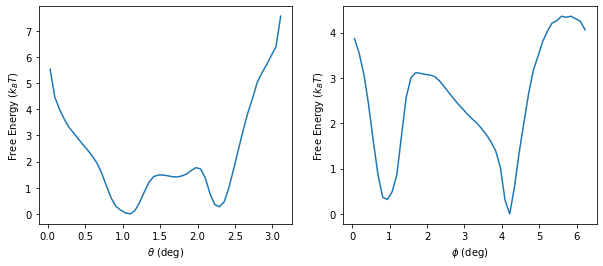

<ipython-input-50-cfaeda67c73d>:57: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(his)


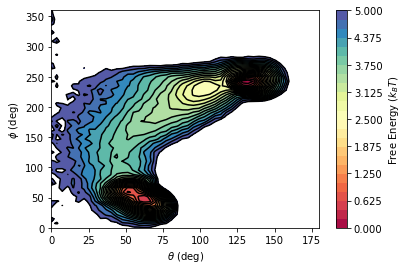

0
1
2
3
4
5
6
7
8
9
10


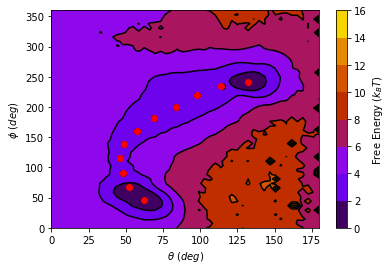

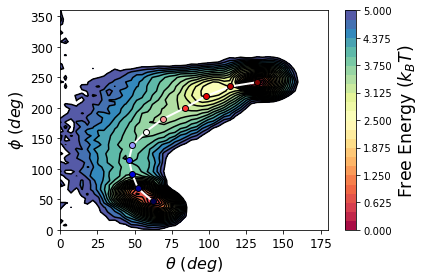

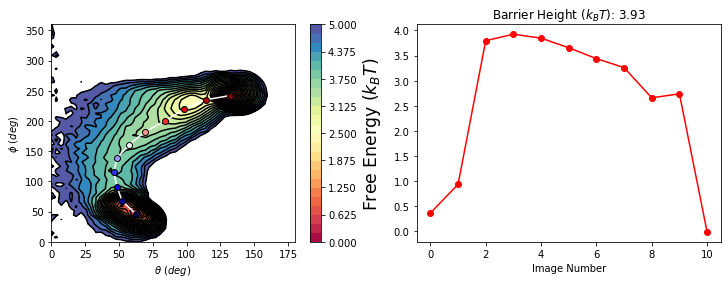

1
2
3
4
5
6
7
8
9
10
11
[ 46.76724863  50.61006161  54.29718917  58.54489559  63.21029389
  67.91797403  72.63759692  77.37805367  82.09603547  86.7880449
  91.48750734  96.17750423 100.90577134 105.68380933 110.46246643
 115.20791218 119.92914486 124.68855451 129.40263905 134.09537589
 138.75874178 143.34324326 147.64455269 152.12838219 156.62946629
 160.86731899 165.06069348 169.41992593 173.57007611 177.74924287
 181.78943098 185.51226981 189.61026122 193.15880235 196.63111202
 200.24738115 203.72563321 207.50814157 211.43294726 215.37365481
 219.48221072 223.64908535 228.01392087 231.61689589 233.5953844
 235.21277628 236.88285608 238.50529085 240.08134013 242.14160489]
[ 62.23282821  59.3921517   56.35205868  54.16884039  53.13520889
  52.31391263  51.56655985  50.96449727  50.2061861   49.299556
  48.43238053  47.51584637  46.82469784  46.73885272  46.76254056
  46.19882023  45.45920062  45.88851345  46.6721691   47.57506434
  48.61907229  49.96767537  52.04894376  53.70134478  5

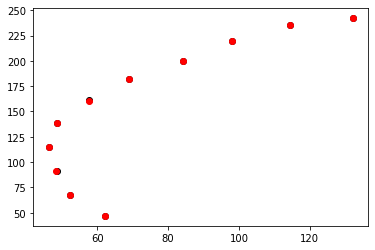

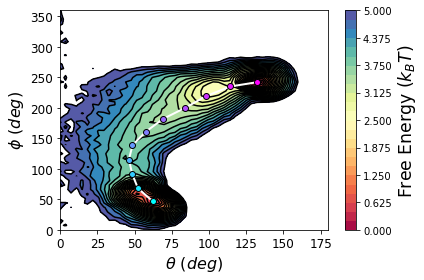

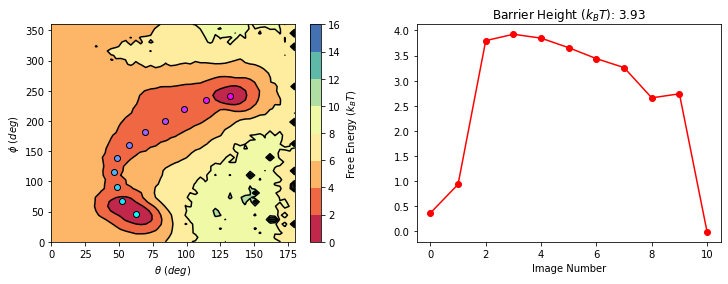

1
2
3
4
5
6
7
8
9
10
11
../1000ns/HA_mode2/
Radial Bins:  1


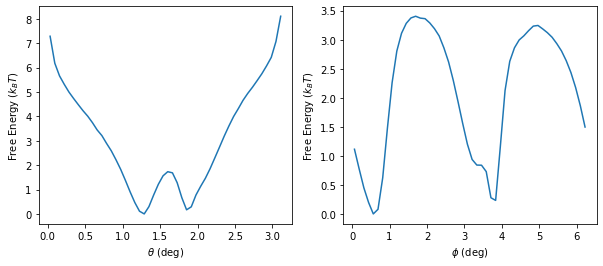

<ipython-input-50-cfaeda67c73d>:57: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(his)


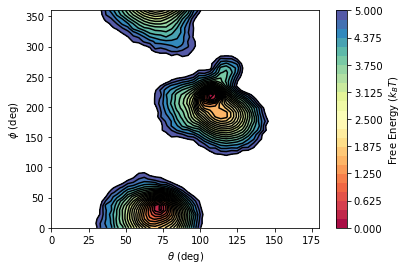

0
1
2
3
4
5
6
7
8
9
10


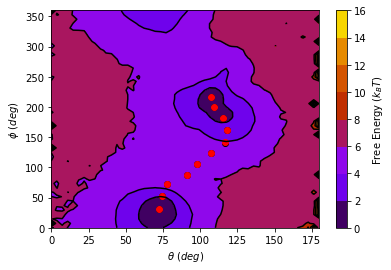

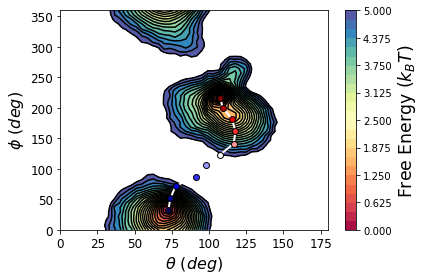

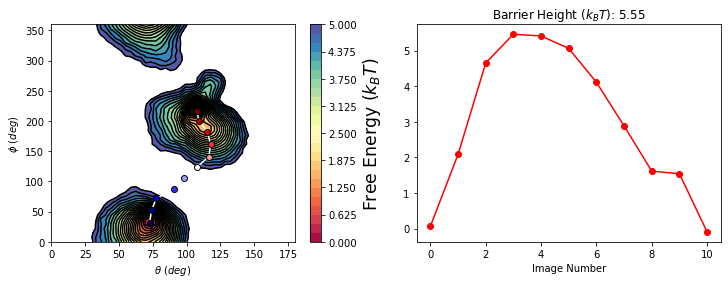

1
2
3
4
5
6
7
8
9
10
11
[ 31.9493557   28.22494832  24.50779925  20.80022305  17.10274564
  13.40073487   9.67750415   5.94691694   2.21906944 358.48837446
 354.76605151 351.05491164 347.35477438 343.66287876 339.98017085
 336.31480729 332.66811734 329.03825768 325.43784739 321.82925198
 318.21643077 314.77230847 311.50834569 308.10766486 304.58714481
 300.91262412 297.1881273  293.53284097 289.997128   286.46534506
 282.87986568 279.31427282 276.17459687 273.11240957 269.56652866
 266.26467069 263.25033742 259.98452085 256.76423591 253.59925422
 250.10572951 246.425575   242.70923742 238.98218042 235.25162312
 231.52056145 227.7894757  224.05855849 220.32804809 216.59837948]
[ 72.66708048  72.44453731  72.1230261   71.70538832  71.2057174
  70.74460975  70.51543744  70.56843613  70.71870581  70.73707062
  70.99061519  71.37500749  71.85430467  72.39347394  72.99196026
  73.68896884  74.47794882  75.34079105  76.31959418  77.26776363
  78.19439584  79.62666308  81.43333357  82.96744108

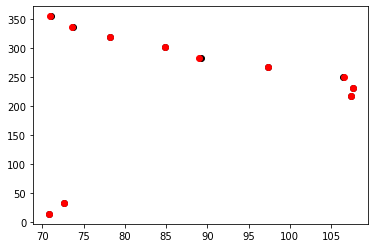

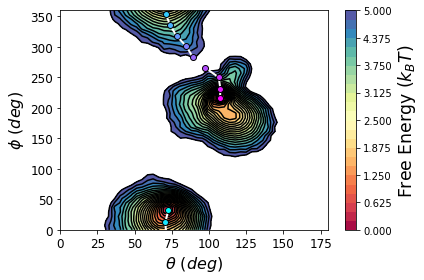

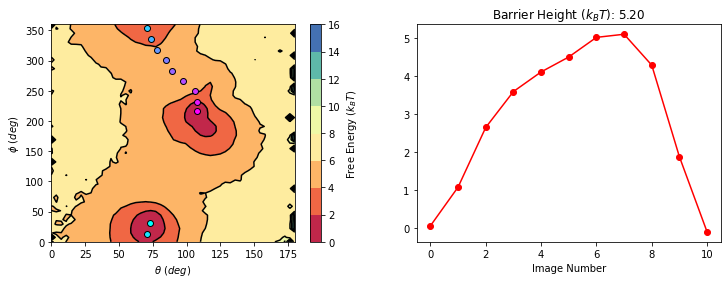

1
2
3
4
5
6
7
8
9
10
11
../1000ns/HA_mode3/
Radial Bins:  1


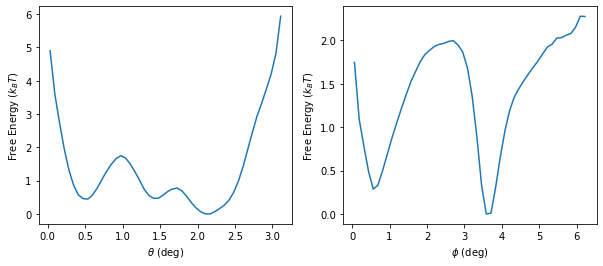

<ipython-input-50-cfaeda67c73d>:57: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(his)


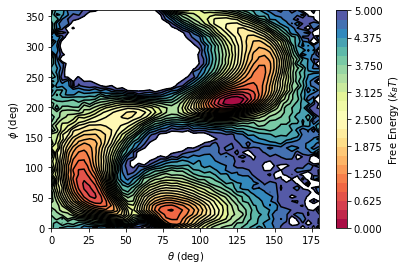

0
1
2
3
4
5
6
7
8
9
10


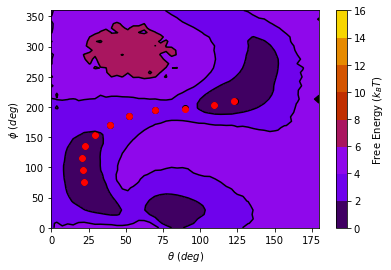

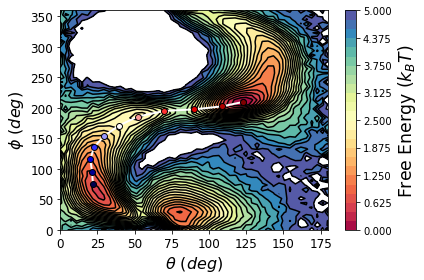

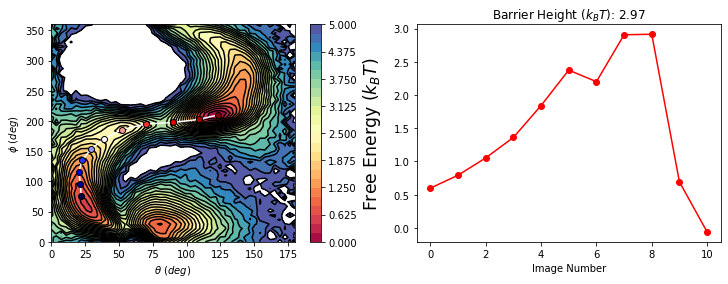

1
2
3
4
5
6
7
8
9
10
11
[ 75.08129401  69.15284694  65.1318678   59.17108523  53.12463505
  47.13512771  41.36989091  36.6136064   31.76031119  28.34775123
  27.91678283  27.82345666  28.94510128  29.73700977  29.67140741
  28.92987296  23.77748992  17.76291191  11.79185501   7.11432873
   4.29470907 359.20742258 354.87139247 350.60274925 346.48868619
 342.41250363 337.85939723 334.0159005  329.08012374 324.36880795
 318.8869604  313.74205396 308.43179339 302.60199138 296.58704976
 290.54213067 284.49232777 278.44287872 272.39125663 266.35299124
 260.31171668 254.26750806 248.24361925 242.33966659 237.31291782
 231.67090561 225.96358472 221.10319925 215.59258652 209.88750456]
[ 22.08444176  23.25895001  27.78158415  28.75862965  29.00252231
  29.86262211  31.64407055  35.38554131  38.97069461  43.91534268
  49.95020322  56.00113563  61.94273436  67.94074231  73.98571186
  79.99140461  83.12292251  83.79161869  84.67721398  88.42008683
  93.71733215  96.98900057 101.21053296 105.5001838

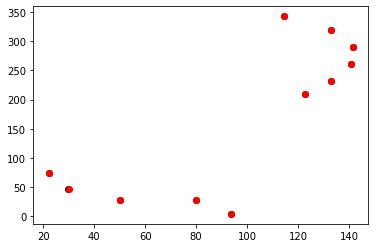

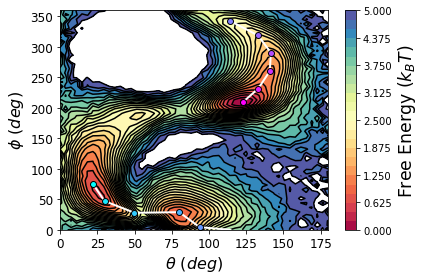

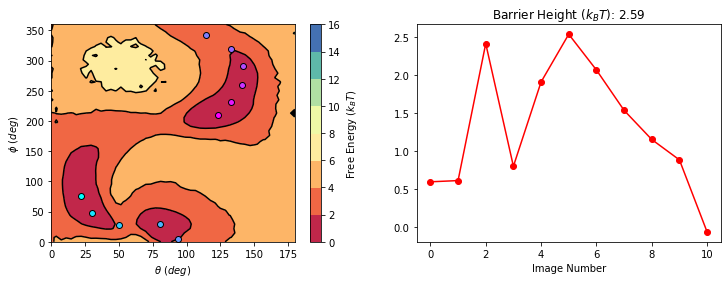

1
2
3
4
5
6
7
8
9
10
11
../1000ns/HA_mode4/
Radial Bins:  1


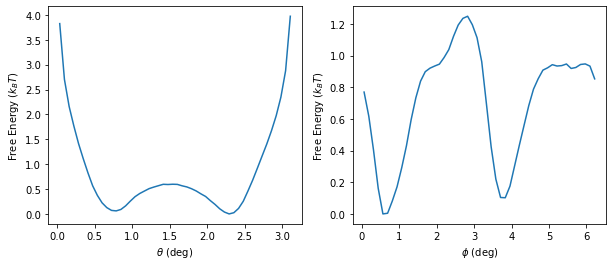

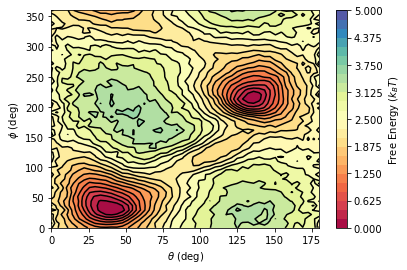

0
1
2
3
4
5
6
7
8
9
10


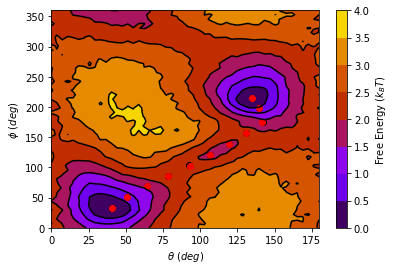

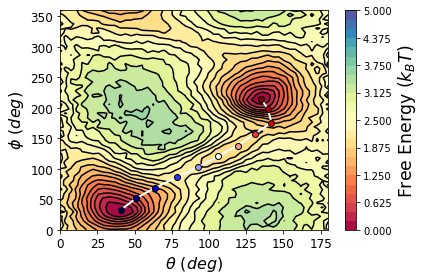

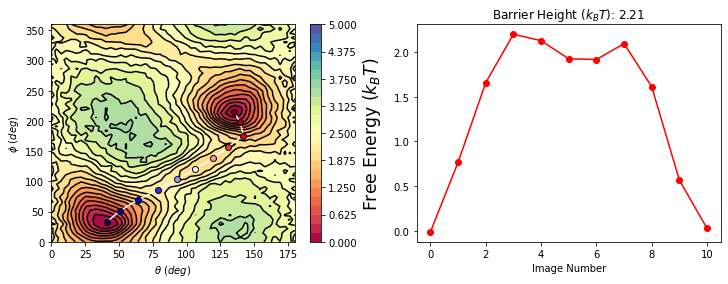

1
2
3
4
5
6
7
8
9
10
11
[3.29690227e+01 2.86038191e+01 2.42430508e+01 1.98779410e+01
 1.55377880e+01 1.13057786e+01 7.44888487e+00 3.78101546e+00
 4.47517109e-02 3.56063943e+02 3.52261781e+02 3.48561382e+02
 3.44792296e+02 3.41016635e+02 3.37535331e+02 3.34246545e+02
 3.30901766e+02 3.27831374e+02 3.25152140e+02 3.22975626e+02
 3.21522178e+02 3.18785078e+02 3.14905546e+02 3.11541082e+02
 3.08760017e+02 3.05805261e+02 3.02480448e+02 2.98897328e+02
 2.96007762e+02 2.93005846e+02 2.89748745e+02 2.86486053e+02
 2.82910745e+02 2.79352193e+02 2.75680421e+02 2.72011831e+02
 2.68677021e+02 2.65108337e+02 2.61391546e+02 2.57582426e+02
 2.53451373e+02 2.49146970e+02 2.44890200e+02 2.40590521e+02
 2.36238030e+02 2.31880720e+02 2.27514886e+02 2.23210793e+02
 2.19222978e+02 2.15082213e+02]
[ 40.9555817   41.05380387  40.83597176  40.91015678  41.37172256
  42.40937565  44.45406616  46.82317715  49.08036338  50.87374969
  53.02062016  55.33863285  57.54328704  59.73627188  62.37189965
  65.24423991 

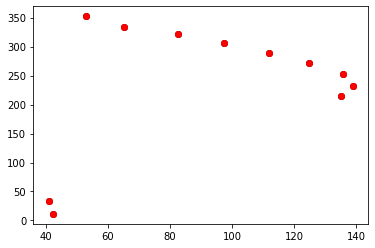

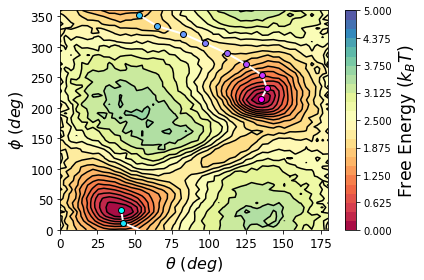

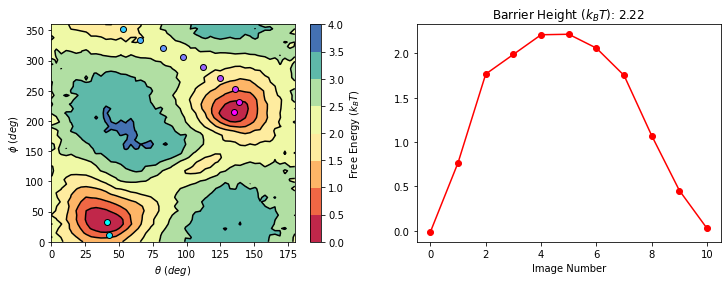

1
2
3
4
5
6
7
8
9
10
11
../1000ns/HA_mode5/
Radial Bins:  1


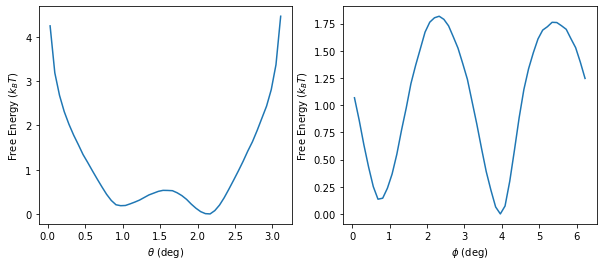

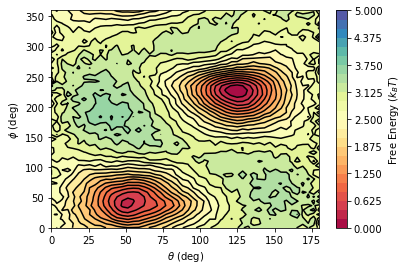

0
1
2
3
4
5
6
7
8
9
10


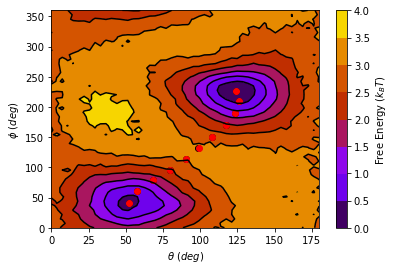

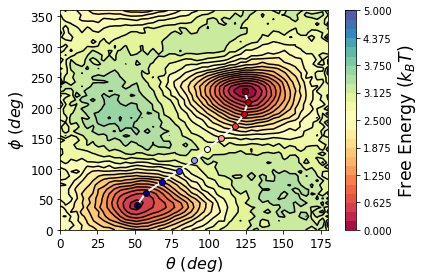

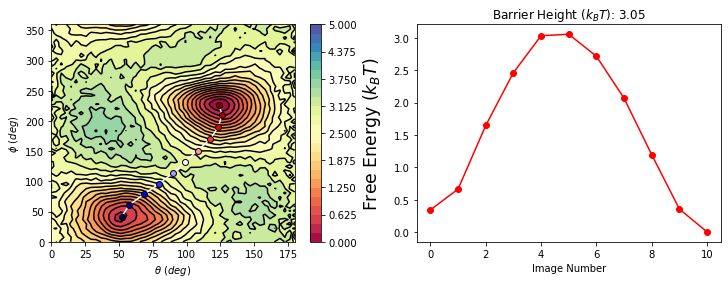

1
2
3
4
5
6
7
8
9
10
11
[ 41.06404595  36.96840489  32.86221525  28.84336436  24.92808896
  20.82581511  16.82457739  12.73792915   8.66875317   4.63679739
   0.56594573 356.46590899 352.361421   348.25133006 344.14166246
 340.03191057 335.92241097 331.89725809 328.09968563 324.29472578
 320.29176633 316.2462043  312.41117613 308.80492132 305.23782697
 301.34923133 297.28137469 293.45285979 290.2137828  287.28447341
 283.73367851 280.0241853  276.50866191 273.25520521 270.09196369
 267.31328559 264.72670765 262.00247915 259.02070701 256.06288587
 253.30836877 250.70248807 247.57244701 243.96893444 240.43689061
 237.9564398  235.65901488 233.180601   230.43598159 226.84727565]
[ 51.90215172  51.54394994  51.69199631  50.82692706  49.58827214
  49.44562757  50.38508705  50.77467123  50.18799144  49.44708616
  50.02141201  50.31555     50.0744397   49.96129813  49.83366176
  49.7127802   49.79261705  50.62298712  52.19908999  53.75468567
  54.69347968  55.42420972  56.90621212  58.8811962

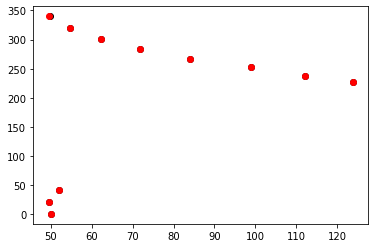

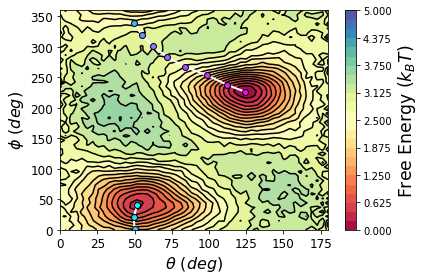

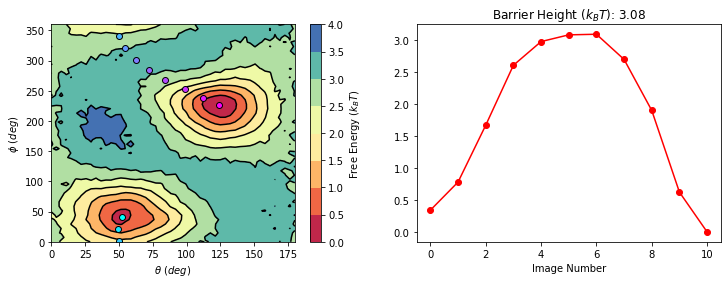

1
2
3
4
5
6
7
8
9
10
11
../1000ns/HA_mode6/
Radial Bins:  1


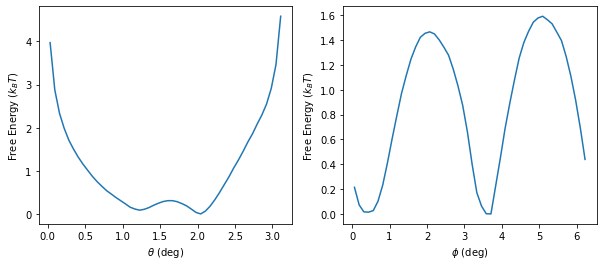

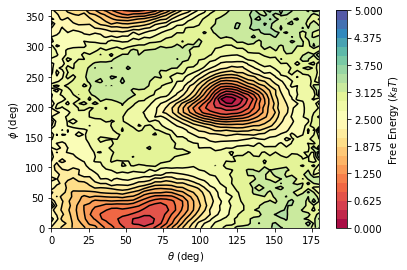

FileNotFoundError: [Errno 2] No such file or directory: '../1000ns/HA_x6bottom.npy'

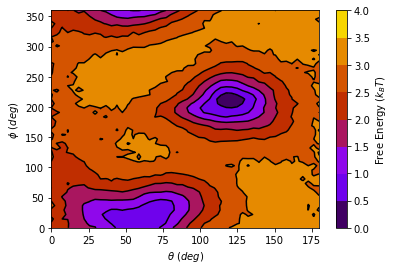

In [50]:
#Need to run this cell!
%matplotlib inline
import os
from sklearn.neighbors import KDTree
bins=50
xx,yy=np.meshgrid(np.linspace(0,180,bins),np.linspace(0,360,bins))
nfrs=0
path = '../1000ns/'
old_path = path
subprocess.call('grep "^ATOM" ' + path + 'top.pdb | grep "CA" |' + "awk '{ print $4 }' > tmp" , shell = True)
res_list = np.loadtxt('tmp', dtype = str)
subprocess.call('rm -rfv tmp' , shell = True)
fes_max = 5
for mode in range(1, 11):
    data = np.load(old_path + 'HA_theta_phi_' + str(mode) + '.npy')
    xtraj = data[:, 0]
    ytraj = data[:, 1]
    nfrs = len(data)
    if os.path.exists(old_path + 'HA_mode'+str(mode)):
        pass
    else:
        os.mkdir(old_path + 'HA_mode'+str(mode))
    path = old_path + 'HA_mode'+str(mode)+'/'
    print(path)
    
    
    x=data[:,2]*np.sin(np.deg2rad(data[:,0]))*np.cos(np.deg2rad(data[:,1]))
    y=data[:,2]*np.sin(np.deg2rad(data[:,0]))*np.sin(np.deg2rad(data[:,1]))
    z=data[:,2]*np.cos(np.deg2rad(data[:,0]))
    for rbins in [1]:
        print('Radial Bins: ',rbins)
        h=physt.special_histograms.spherical(np.column_stack([x,y,z]),theta_bins=50,phi_bins=50,radial_bins=rbins)

        #Plot 1D histograms as well
        fig,(ax0,ax1) = plt.subplots(1,2, sharey=False,figsize=(10,4))
        fes1 = -np.log(h.projection("theta").frequencies/h.projection("theta").frequencies.sum())

        fes1 -= fes1.min()

        edges=h.projection("theta").bins
        ax0.plot((edges[:,0]+edges[:,1])/2,fes1)
        ax0.set_xlabel(r'$\theta$ (deg)')
        ax0.set_ylabel(r'Free Energy $(k_BT)$')

        fes2 = -np.log(h.projection("phi").frequencies/h.projection("phi").frequencies.sum())
        fes2 -= fes2.min()

        edges=h.projection("phi").bins
        ax1.plot((edges[:,0]+edges[:,1])/2,fes2)
        ax1.set_xlabel(r'$\phi$ (deg)')
        ax1.set_ylabel(r'Free Energy $(k_BT)$')

        plt.show()
        plt.close()

        his=(h.densities[0]/h.densities[0].sum()).T
        fes = -np.log(his)
        fes -= fes.min()
        femax = -np.log(1/nfrs)
        for j in range(fes.shape[0]):
            for k in range(fes.shape[1]):
                if np.isinf(fes[j,k]) == True:
                    fes[j,k] = femax
        #np.save('fes'+str(mode)+'.npy',fes)

        xx,yy=np.meshgrid(np.linspace(0,180,his.shape[1]),np.linspace(0,360,his.shape[0]))
        im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
        cbar=plt.colorbar(im)
        cbar.set_label(r'Free Energy $(k_BT)$')
        plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
        plt.xlabel(r'$\theta$ (deg)')
        plt.ylabel(r'$\phi$ (deg)')
        plt.savefig(path + 'fes'+str(mode)+'.pdf',dpi=1000)
        plt.show()
        plt.close()
        for j in range(fes.shape[0]):
            for k in range(fes.shape[1]):
                if np.isinf(fes[j,k]) == True:
                    fes[j,k] = femax
                    
    #np.save(old_path + 'fes'+str(mode)+'.npy',fes)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='gnuplot')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$")
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    
    data = data[:, :2]
    #Bottom Path
    xb=np.load(old_path + 'HA_x'+str(mode)+'bottom.npy')
    yb=np.load(old_path + 'HA_y'+str(mode)+'bottom.npy')
    fes=np.load(old_path + 'HA_fes'+str(mode)+'.npy')

    sumx=np.copy(xb)
    sumy=np.copy(yb)
    xb=sumx[0:len(sumx):5]
    yb=sumy[0:len(sumx):5]
    xb=np.append(xb,sumx[-1])
    yb=np.append(yb,sumy[-1])
    
    for i in range(len(yb)):
        if yb[i] <= 0.0:
            yb[i] += 360.0
    for i in range(len(yb)):
        if yb[i] >= 360.0:
            yb[i] -= 360.0
    
    #Find the 100 nearest neighbors to each point using a kdtree
    bottomlist=[]
    
    tree=KDTree(data)
    plt.scatter(xb,yb,c='k')
    knn=1000
    for i in range(len(xb)):
        print(i)
        dist,ind=tree.query(np.column_stack([xb,yb])[i].reshape(1, -1), k=knn)
        plt.scatter(xtraj[ind[0][0]],ytraj[ind[0][0]],c='r')
        dummylist=[]
        for j in range(len(ind[0])):
            dummylist.append(ind[0][j])
        bottomlist.append(dummylist)

    dummy = avg_coor #np.loadtxt(old_path + 'avg_coor')
    ax=dummy[:,0]
    ay=dummy[:,1]
    az=dummy[:,2]

    rx=np.zeros((nres,nfrs))
    ry=np.zeros((nres,nfrs))
    rz=np.zeros((nres,nfrs))
    counti = -1
    for i in range(0,3*nres,3):
        counti += 1
        rx[counti,:]=traj[i,:]-ax[counti]
        ry[counti,:]=traj[i+1,:]-ay[counti]
        rz[counti,:]=traj[i+2,:]-az[counti]
    nimages=len(bottomlist)
    avgx=np.zeros((nres,nimages))
    avgy=np.zeros((nres,nimages))
    avgz=np.zeros((nres,nimages))
    for k in range(nimages):
        for i in bottomlist[k]:
            avgx[:,k] += rx[:,i]
            avgy[:,k] += ry[:,i]
            avgz[:,k] += rz[:,i]
        avgx[:,k] /= float(len(bottomlist[k]))
        avgy[:,k] /= float(len(bottomlist[k]))
        avgz[:,k] /= float(len(bottomlist[k])) 
        
    axbottom=avgx
    aybottom=avgy
    azbottom=avgz
    
    plt.show()
    plt.close()
    
    #It works -- write coordinates to a PDB file
    subprocess.call('rm -rfv '+path+'mode'+str(mode)+'image_avg_bottom.pdb',shell=True)
    f=open(path+'mode'+str(mode)+'image_avg_bottom.pdb',"w+")
    for k in range(nimages):
        f.write('MODEL '+str(k+1)+'\n')
        #f.write(str(nres)+"\n")
        for i in range(nres):
            #if i == nres-1:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k]))
            #else:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k])+"\n")
            f.write("{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format("ATOM",i+1,"CA", " ", str(res_list[i]), ascii_uppercase[k],i+1," ",10.0*(avgx[i,k]+ax[i]),10.0*(avgy[i,k]+ay[i]),10.0*(avgz[i,k]+az[i]),1.00,0.00,"C"," ")) 
        f.write('TER\n')
        if k == nimages-1:
            f.write('ENDMDL')
        else:
            f.write('ENDMDL\n')
    f.close()    
    
    
    xavg = xb
    yavg = yb
    framelist = np.copy(bottomlist)
    ifes = interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0, 180))
    plt.ylim((0, 360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout()
    plt.savefig(path+'HA_bottom_fes'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    plt.plot(xavg[:],yavg[:],color='w')
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
    #for i in range(len(framelist)):
    #    for j in range(0,len(bottomlist[i]),1000):
    #        plt.scatter(xtraj[bottomlist[i][j]],ytraj[bottomlist[i][j]],color=colors[i])
    plt.subplot(1,2,2)
    points=[]
    for i in range(len(xavg)):
        points.append(ifes(xavg[i],yavg[i])[0])
        #print(points[i])
    plt.plot(points,color='r')
    plt.scatter(np.arange(len(xavg)),points,c='r')
    plt.xlabel('Image Number')
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.title(r'Barrier Height $(k_BT)$: '+str(np.max(points)-np.min(points))[:4])
    plt.savefig(path+'HA_bottom_path_mode'+str(mode)+'avg_energy.pdf')
    plt.show()
    plt.close()
    barrier=np.max(points)-np.min(points)
    np.savetxt(old_path + 'barrier_bottom'+str(mode),np.array(barrier).reshape(1,),fmt='%1.4e')
    
    np.savetxt(path+'coords_'+str(mode)+'.dat',np.column_stack([xb,yb]))
    for i in range(len(bottomlist)):
        print(i+1)
        f=open(path+'bottom_'+str(mode)+'_'+str(i+1)+'_10NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(bottomlist[i])):
            f.write(str(bottomlist[i][j])+'\n')
        f.close()
        
    #Top Path
    
    #Import data
    if os.path.exists(old_path + 'HA_x'+str(mode)+'top.npy'):
        xt = np.load(old_path + 'HA_x'+str(mode)+'top.npy')
        yt = np.load(old_path + 'HA_y'+str(mode)+'top.npy')
    else:
        xt = np.load(old_path + 'HA_x'+str(mode)+'bottom.npy')
        yt = np.load(old_path + 'HA_y'+str(mode)+'bottom.npy')
    fes=np.load(old_path + 'HA_fes'+str(mode)+'.npy')

    for i in range(len(yt)):
        if yt[i] <= 0.0:
            yt[i] += 360.0
    for i in range(len(yt)):
        if yt[i] >= 360.0:
            yt[i] -= 360.0
    print(yt)
    print(xt)

    sumx=np.copy(xt)
    sumy=np.copy(yt)
    xt=sumx[0:len(sumx):5]
    yt=sumy[0:len(sumx):5]
    xt=np.append(xt,sumx[-1])
    yt=np.append(yt,sumy[-1])
    sumx=np.copy(xt)
    sumy=np.copy(yt)
    
    toplist=[]
    tree=KDTree(np.column_stack([xtraj,ytraj]))
    plt.scatter(xt,yt,c='k')
    for i in range(len(xb)):
        print(i)
        dist,ind=tree.query(np.column_stack([xt,yt])[i].reshape(1, -1),k=knn)
        plt.scatter(xtraj[ind[0][0]],ytraj[ind[0][0]],c='r')
        dummylist=[]
        for j in range(len(ind[0])):
            dummylist.append(ind[0][j])
        toplist.append(dummylist)
    plt.show()
    plt.close()
    
    dummy = avg_coor #np.loadtxt(old_path + 'avg_coor')
    ax=dummy[:,0]
    ay=dummy[:,1]
    az=dummy[:,2]

    rx=np.zeros((nres,nfrs))
    ry=np.zeros((nres,nfrs))
    rz=np.zeros((nres,nfrs))
    counti = -1
    for i in range(0,3*nres,3):
        counti += 1
        rx[counti,:]=traj[i,:]-ax[counti]
        ry[counti,:]=traj[i+1,:]-ay[counti]
        rz[counti,:]=traj[i+2,:]-az[counti]
    nimages=len(toplist)
    avgx=np.zeros((nres,nimages))
    avgy=np.zeros((nres,nimages))
    avgz=np.zeros((nres,nimages))
    for k in range(nimages):
        for i in toplist[k]:
            avgx[:,k] += rx[:,i]
            avgy[:,k] += ry[:,i]
            avgz[:,k] += rz[:,i]
        avgx[:,k] /= float(len(toplist[k]))
        avgy[:,k] /= float(len(toplist[k]))
        avgz[:,k] /= float(len(toplist[k])) 
        
    #It works -- write coordinates to a PDB file
    subprocess.call('rm -rfv '+path+'mode'+str(mode)+'image_avg_top.pdb',shell=True)
    f=open(path+'mode'+str(mode)+'image_avg_top.pdb',"w+")
    for k in range(nimages):
        f.write('MODEL '+str(k+1)+'\n')
        #f.write(str(nres)+"\n")
        for i in range(nres):
            #if i == nres-1:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k]))
            #else:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k])+"\n")
            f.write("{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format("ATOM",i+1,"CA", " ",str(res_list[i]), ascii_uppercase[k], i+1," ",10.0*(avgx[i,k]+ax[i]),10.0*(avgy[i,k]+ay[i]),10.0*(avgz[i,k]+az[i]),1.00,0.00,"C"," ")) 
        f.write('TER\n')
        if k == nimages-1:
            f.write('ENDMDL')
        else:
            f.write('ENDMDL\n')
    f.close() 
    
    #Import the average positions in (\theta,\phi) space:
    #dummy=np.loadtxt('mode1avg_traj.dat')
    xavg=xt
    yavg=yt
    framelist=np.copy(toplist)
    ifes=interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    if mode == 7:
        colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    else:
        colors = plt.cm.cool(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0, 180))
    plt.ylim((0, 360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout()
    plt.savefig(path+'/top_fes'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='Spectral')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$")
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
    #for i in range(len(framelist)):
    #    for j in range(0,len(bottomlist[i]),1000):
    #        plt.scatter(xtraj[bottomlist[i][j]],ytraj[bottomlist[i][j]],color=colors[i])
    plt.subplot(1,2,2)
    points=[]
    for i in range(len(xavg)):
        points.append(ifes(xavg[i],yavg[i])[0])
        #print(points[i])
    plt.plot(points,color='r')
    plt.scatter(np.arange(len(xavg)),points,c='r')
    plt.xlabel('Image Number')
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.title(r'Barrier Height $(k_BT)$: '+str(np.max(points)-np.min(points))[:4])
    plt.savefig(path+'top_path_mode'+str(mode)+'avg_energy.pdf')
    barrier=np.max(points)-np.min(points)
    np.savetxt(path+'barrier_top'+str(mode),np.array(barrier).reshape(1,),fmt='%1.4e')
    plt.show()
    plt.close()
    
    for i in range(len(toplist)):
        print(i+1)
        f=open(path+'top_'+str(mode)+'_'+str(i+1)+'_10NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(toplist[i])):
            f.write(str(toplist[i][j])+'\n')
        f.close()
        
    
    '''#Interpolated Trajectory
    interpol_traj=np.loadtxt(old_path + 'interpol'+str(mode)+'_traj.dat')[:, :2]
    print(interpol_traj)
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],color=colors[i],marker='s',label='Interpolation',lw=0,edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],color=colors[i],marker='s',lw=0,markeredgecolor='k')
    plt.legend()
    plt.savefig(path+'interpol-traj-mode'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    #Compare
    colors = plt.cm.cool(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    #plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    #plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    colors = plt.cm.spring(np.linspace(0,1,len(bottomlist)))
    for i in range(len(interpol_traj) - 1):
        if abs(interpol_traj[i + 1, 1] - interpol_traj[i, 1]) <= 180:
            plt.plot(interpol_traj[i:i+2,0],interpol_traj[i:i+2,1], c = 'k', lw = 2)
        else:
            if interpol_traj[i, 1] < 180:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 0]), color = 'k', lw = 2)
            else:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 360]), color = 'k', lw = 2)
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',label='Interpolation',edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',markeredgecolor='k')
    #plt.legend()
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.savefig(path+'interpol-traj-comp-mode'+str(mode)+'-top_black.pdf', dpi = 300)
    plt.show()
    plt.close()
    
    #Compare
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xbottom[:],ybottom[:],color='w')
    for i in range(len(xb) -1 ):
        if abs(yb[i + 1] - yb[i]) <= 180:
            plt.plot(xb[i:i+2], yb[i:i+2], color = 'w', lw = 2)
        else:
            if yb[i] < 180:
                plt.plot(xb[i:i+2], np.array([yb[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xb[i:i+2], np.array([yb[i], 360]), color = 'w', lw = 2)
    for i in range(len(xb)):
        plt.plot(xb[i],yb[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xb[i],yb[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    #plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    #plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    colors = plt.cm.spring(np.linspace(0,1,len(bottomlist)))
    for i in range(len(interpol_traj) - 1):
        if abs(interpol_traj[i + 1, 1] - interpol_traj[i, 1]) <= 180:
            plt.plot(interpol_traj[i:i+2,0],interpol_traj[i:i+2,1], c = 'k', lw = 2)
        else:
            if interpol_traj[i, 1] < 180:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 0]), color = 'k', lw = 2)
            else:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 360]), color = 'k', lw = 2)
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',label='Interpolation',edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',markeredgecolor='k')
    #plt.legend()
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.savefig(path+'interpol-traj-comp-mode'+str(mode)+'-bottom_black.pdf', dpi = 300)
    plt.show()
    plt.close()
    
    interlist=[]
    tree=KDTree(np.column_stack([xtraj,ytraj]))
    #plt.contourf(xx,yy,fes,cmap=plt.cm.Spectral)
    #plt.contour(xx,yy,fes,colors='k')
    #plt.scatter(interpol_traj[:,0],interpol_traj[:,1],c='k')
    for i in range(len(interpol_traj[:,0])):
        print(i)
        dist,ind=tree.query(interpol_traj[i].reshape(1, -1),k=1)
        #plt.scatter(xtraj[ind][0],ytraj[ind][0],c='r')
        dummylist=[]
        for j in range(len(ind)):
            dummylist.append(ind[0][j])
        interlist.append(dummylist)
        
    ifes=interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    colors = plt.cm.seismic(np.linspace(0,1,len(toplist)))
    plt.figure(figsize=(20,6.25))
    plt.subplot(1,2,1)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='Spectral')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$",size=14,fontsize='xx-large')
    plt.xlabel(r'$\theta\ (deg)$',size=14)
    plt.ylabel(r'$\phi\ (deg)$',size=14)
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xt[-1:],ytop[-1:],color='w')
    #plt.plot(xt[:-1],ytop[:-1],color='w')
    for i in range(len(xt)):
        plt.plot(xt[i],yt[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xt)-1:
            plt.scatter(xt[i],yt[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    #plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    #plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',label='Interpolation',edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',markeredgecolor='k')
    plt.legend(fontsize='large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')

    plt.subplot(1,2,2)
    points=[]
    ifeslist=[]
    for i in range(len(toplist)):
        dummylist=[]
        for j in toplist[i]:
            dummylist.append(ifes(xtraj[j],ytraj[j])[0])
        ifeslist.append(np.array(dummylist).std())
    ifeslist=np.array(ifeslist)
    for i in range(len(xt)):
        points.append(ifes(xt[i],yt[i])[0])
    plt.plot(points,label='FEP',c='k',ls='--')

    for i in range(len(interpol_traj[:,0])):
        pts=ifes(xt[i],yt[i])[0]
        plt.errorbar(np.arange(0,11)[i],points[i],yerr=ifeslist[i],linewidth=0,marker='o',c='k',elinewidth=1,capsize=3,color=colors[i])
        plt.plot(i,pts,markeredgecolor='b',marker='o',c=colors[i])
    textstr='FEP Barrier Height: '+str(round(float(np.max(points)-np.min(points)),2))+' $k_BT$'
    plt.annotate(textstr,size=14,xy=(0.25, 0.05), xycoords='axes fraction')
    points=[]
    for i in range(len(interpol_traj[:,0])):
        points.append(ifes(interpol_traj[:,0][i],interpol_traj[:,1][i])[0])
    plt.plot(points,label='Interpolation',c='r',ls='--')
    for i in range(len(interpol_traj[:,0])):
        pts=ifes(interpol_traj[:,0][i],interpol_traj[:,1][i])[0]
        plt.plot(i,pts,markeredgecolor='k',marker='o',color=colors[i])

    plt.xlabel('Image Number',size=14)
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.legend(fontsize='large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    textstr='Interpolated Barrier Height: '+str(round(float(np.max(points)-np.min(points)),2))+' $k_BT$'
    plt.annotate(textstr,size=14,xy=(0.25, 0.01), xycoords='axes fraction')
    plt.savefig(path+'top_interpol_mode'+str(mode)+'_energy.pdf')
    plt.show()
    plt.close()
    
    ifes=interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    plt.figure(figsize=(20,6.25))
    plt.subplot(1,2,1)
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$',size=14)
    plt.ylabel(r'$\phi\ (deg)$',size=14)
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xbottom[:],ybottom[:],color='w')
    #plt.plot(xbottom[:],ybottom[:],color='w')
    for i in range(len(xavg)):
        plt.plot(xb[i],yb[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xb[i],yb[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    #plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    #plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',label='Interpolation',edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',markeredgecolor='k')
    plt.legend(fontsize='large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')

    plt.subplot(1,2,2)
    points=[]
    ifeslist=[]
    for i in range(len(bottomlist)):
        dummylist=[]
        for j in bottomlist[i]:
            dummylist.append(ifes(xtraj[j],ytraj[j])[0])
        ifeslist.append(np.array(dummylist).std())
    ifeslist=np.array(ifeslist)
    for i in range(len(xb)):
        points.append(ifes(xb[i],yb[i])[0])
    plt.plot(points,label='FEP',c='k',ls='--')

    for i in range(len(interpol_traj[:,0])):
        pts=ifes(xb[i],yb[i])[0]
        plt.errorbar(np.arange(0,11)[i],points[i],yerr=ifeslist[i],linewidth=0,marker='o',c='k',elinewidth=1,capsize=3,color=colors[i])
        plt.plot(i,pts,markeredgecolor='b',marker='o',c=colors[i])
    textstr='FEP Barrier Height: '+str(round(float(np.max(points)-np.min(points)),2))+' $k_BT$'
    plt.annotate(textstr,size=14,xy=(0.25, 0.05), xycoords='axes fraction')
    points=[]
    for i in range(len(interpol_traj[:,0])):
        points.append(ifes(interpol_traj[:,0][i],interpol_traj[:,1][i])[0])
    plt.plot(points,label='Interpolation',c='r',ls='--')
    for i in range(len(interpol_traj[:,0])):
        pts=ifes(interpol_traj[:,0][i],interpol_traj[:,1][i])[0]
        plt.plot(i,pts,markeredgecolor='k',marker='o',color=colors[i])

    plt.xlabel('Image Number',size=14)
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.legend(fontsize='large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    textstr='Interpolated Barrier Height: '+str(round(float(np.max(points)-np.min(points)),2))+' $k_BT$'
    plt.annotate(textstr,size=14,xy=(0.25, 0.01), xycoords='axes fraction')
    plt.savefig(path+'bottom_interpol_mode'+str(mode)+'_energy.pdf')
    plt.show()
    plt.close()
    
    for i in range(len(interlist)):
        print(i+1)
        f=open(path+'interpol_'+str(mode)+'_'+str(i+1)+'_NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(interlist[i])):
            f.write(str(interlist[i][j])+'\n')
        f.close()
    
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='Spectral')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$",size=14,fontsize='xx-large')
    plt.xlabel(r'$\theta\ (deg)$',size=14)
    plt.ylabel(r'$\phi\ (deg)$',size=14)
    plt.xlim((0,180))
    plt.ylim((0,360))
    for i in range(len(bottomlist)):
        print(i)
        for j in bottomlist[i][:101]:
            plt.scatter(xtraj[j],ytraj[j],color=colors[i],marker='o',edgecolor='k')
    plt.show()
    plt.close()'''

../../mode1/
Radial Bins:  1


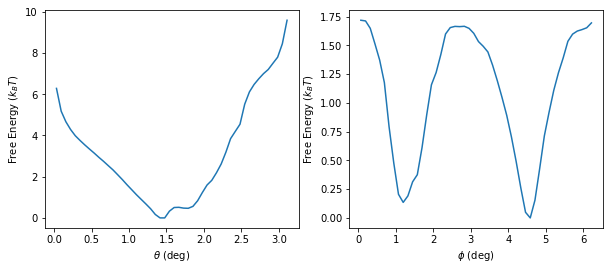

/home/ebeyerle/bin/anaconda3/envs/pyemma_tutorials/lib/python3.7/site-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log


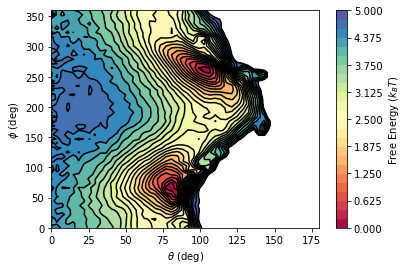

0
1
2
3
4
5
6
7
8
9
10


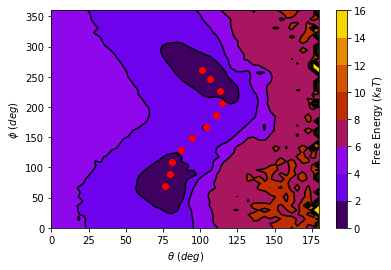

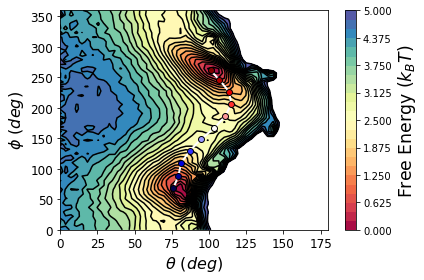

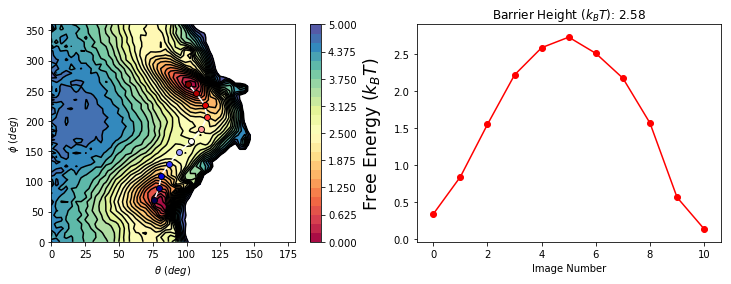

1
2
3
4
5
6
7
8
9
10
11
[ 68.73496451  65.18893034  61.64201187  58.09593387  54.54951344
  51.00617342  47.47630291  43.95008314  40.41381871  36.87049802
  33.32923183  29.80970786  26.33984165  22.89953727  19.45894337
  16.00872322  12.51929058   8.97865689   5.44992546   1.96609583
 358.41910935 354.87357757 351.33347855 347.82526823 344.33369678
 340.83066792 337.30020532 333.75745388 330.24041089 326.78804838
 323.2992659  319.76546134 316.24199904 312.81370222 309.45726173
 306.09511456 302.77359371 299.53389372 296.30334938 293.01067618
 289.67238255 286.43059699 283.349567   280.18215017 276.99303268
 273.97025876 270.94186396 267.97085722 264.97058068 261.62067665]
[ 76.14563931  76.06246968  76.04207661  76.12352782  76.17270196
  76.01804149  75.66987111  75.28726481  75.01295955  74.8511532
  74.65752093  74.2227372   73.48756984  72.62407161  71.76175267
  70.93926345  70.30509926  70.10101586  70.45975862  71.12503553
  71.11053086  71.00824649  71.22793806  71.75070212

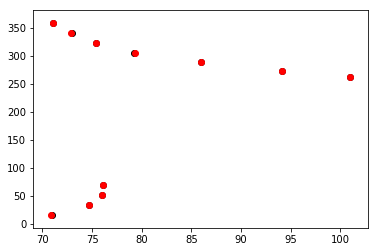

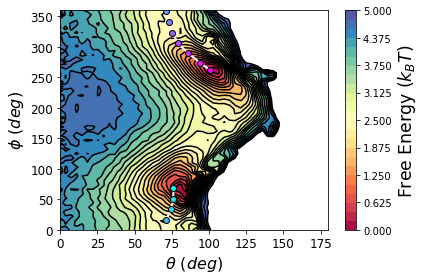

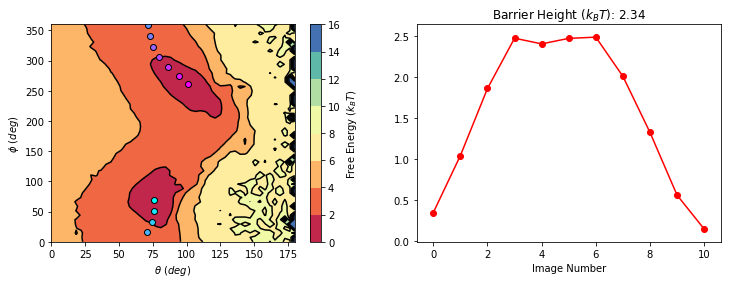

1
2
3
4
5
6
7
8
9
10
11
[[127.76905756 228.89199109]
 [131.94279656 226.31617484]
 [138.71606078 221.19814706]
 [150.41753331 206.76963451]
 [160.10306348 138.25310641]
 [131.92462418  82.69147719]
 [107.59115335  70.8345306 ]
 [ 95.154465    66.30595945]
 [ 88.38027768  63.9468778 ]
 [ 84.24839323  62.5042092 ]]


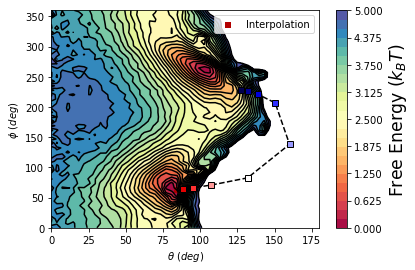

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


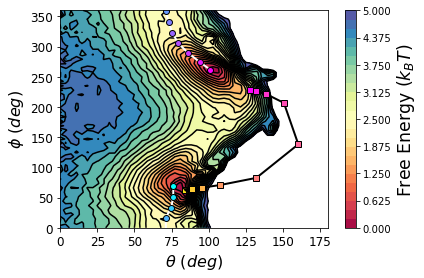

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


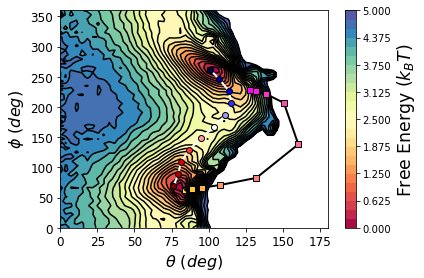

0
1
2
3
4
5
6
7
8
9


In [7]:
#Reverse the coloring of the bottom path for mode 1 since the figure in the main text has the reverse coloration
#in the real-space structure.
%matplotlib inline
import os
from sklearn.neighbors import KDTree
bins=50
xx,yy=np.meshgrid(np.linspace(0,180,bins),np.linspace(0,360,bins))
nfrs=0
path = '../1000ns/'
old_path = path
subprocess.call('grep "^ATOM" ' + path + 'top.pdb | grep "CA" |' + "awk '{ print $4 }' > tmp" , shell = True)
res_list = np.loadtxt('tmp', dtype = str)
subprocess.call('rm -rfv tmp' , shell = True)
fes_max = 5
for mode in [1]: #range(1, 11):
    data = np.loadtxt(old_path + 'anly_' + str(mode) + '.dat')
    xtraj = data[:, 0]
    ytraj = data[:, 1]
    nfrs = len(data)
    if os.path.exists(old_path + 'mode'+str(mode)):
        pass
    else:
        os.mkdir(old_path + 'mode'+str(mode))
    path = old_path + 'mode'+str(mode)+'/'
    print(path)
    
    
    x=data[:,2]*np.sin(np.deg2rad(data[:,0]))*np.cos(np.deg2rad(data[:,1]))
    y=data[:,2]*np.sin(np.deg2rad(data[:,0]))*np.sin(np.deg2rad(data[:,1]))
    z=data[:,2]*np.cos(np.deg2rad(data[:,0]))
    for rbins in [1]:
        print('Radial Bins: ',rbins)
        h=physt.special.spherical_histogram(np.column_stack([x,y,z]),theta_bins=50,phi_bins=50,radial_bins=rbins)

        #Plot 1D histograms as well
        fig,(ax0,ax1) = plt.subplots(1,2, sharey=False,figsize=(10,4))
        fes1 = -np.log(h.projection("theta").frequencies/h.projection("theta").frequencies.sum())

        fes1 -= fes1.min()

        edges=h.projection("theta").bins
        ax0.plot((edges[:,0]+edges[:,1])/2,fes1)
        ax0.set_xlabel(r'$\theta$ (deg)')
        ax0.set_ylabel(r'Free Energy $(k_BT)$')

        fes2 = -np.log(h.projection("phi").frequencies/h.projection("phi").frequencies.sum())
        fes2 -= fes2.min()

        edges=h.projection("phi").bins
        ax1.plot((edges[:,0]+edges[:,1])/2,fes2)
        ax1.set_xlabel(r'$\phi$ (deg)')
        ax1.set_ylabel(r'Free Energy $(k_BT)$')

        plt.show()
        plt.close()

        his=(h.densities[0]/h.densities[0].sum()).T
        fes = -np.log(his)
        fes -= fes.min()
        femax = -np.log(1/nfrs)
        for j in range(fes.shape[0]):
            for k in range(fes.shape[1]):
                if np.isinf(fes[j,k]) == True:
                    fes[j,k] = femax
        np.save('fes'+str(mode)+'.npy',fes)

        xx,yy=np.meshgrid(np.linspace(0,180,his.shape[1]),np.linspace(0,360,his.shape[0]))
        im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
        cbar=plt.colorbar(im)
        cbar.set_label(r'Free Energy $(k_BT)$')
        plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
        plt.xlabel(r'$\theta$ (deg)')
        plt.ylabel(r'$\phi$ (deg)')
        plt.savefig(path + 'fes'+str(mode)+'.pdf',dpi=1000)
        plt.show()
        plt.close()
        for j in range(fes.shape[0]):
            for k in range(fes.shape[1]):
                if np.isinf(fes[j,k]) == True:
                    fes[j,k] = femax
                    
    np.save(old_path + 'fes'+str(mode)+'.npy',fes)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='gnuplot')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$")
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    
    data = data[:, :2]
    #Bottom Path
    xb=np.load(old_path + 'x'+str(mode)+'bottom.npy')
    yb=np.load(old_path + 'y'+str(mode)+'bottom.npy')
    fes=np.load(old_path + 'fes'+str(mode)+'.npy')

    sumx=np.copy(xb)
    sumy=np.copy(yb)
    xb=sumx[0:len(sumx):5]
    yb=sumy[0:len(sumx):5]
    xb=np.append(xb,sumx[-1])
    yb=np.append(yb,sumy[-1])
    
    for i in range(len(yb)):
        if yb[i] <= 0.0:
            yb[i] += 360.0
    for i in range(len(yb)):
        if yb[i] >= 360.0:
            yb[i] -= 360.0
    
    #Find the 100 nearest neighbors to each point using a kdtree
    bottomlist=[]
    
    tree=KDTree(data)
    plt.scatter(xb,yb,c='k')
    knn=1000
    for i in range(len(xb)):
        print(i)
        dist,ind=tree.query(np.column_stack([xb,yb])[i].reshape(1, -1), k=knn)
        plt.scatter(xtraj[ind[0][0]],ytraj[ind[0][0]],c='r')
        dummylist=[]
        for j in range(len(ind[0])):
            dummylist.append(ind[0][j])
        bottomlist.append(dummylist)

    dummy = avg_coor #np.loadtxt(old_path + 'avg_coor')
    ax=dummy[:,0]
    ay=dummy[:,1]
    az=dummy[:,2]

    rx=np.zeros((nres,nfrs))
    ry=np.zeros((nres,nfrs))
    rz=np.zeros((nres,nfrs))
    counti = -1
    for i in range(0,3*nres,3):
        counti += 1
        rx[counti,:]=traj[i,:]-ax[counti]
        ry[counti,:]=traj[i+1,:]-ay[counti]
        rz[counti,:]=traj[i+2,:]-az[counti]
    nimages=len(bottomlist)
    avgx=np.zeros((nres,nimages))
    avgy=np.zeros((nres,nimages))
    avgz=np.zeros((nres,nimages))
    for k in range(nimages):
        for i in bottomlist[k]:
            avgx[:,k] += rx[:,i]
            avgy[:,k] += ry[:,i]
            avgz[:,k] += rz[:,i]
        avgx[:,k] /= float(len(bottomlist[k]))
        avgy[:,k] /= float(len(bottomlist[k]))
        avgz[:,k] /= float(len(bottomlist[k])) 
        
    axbottom=avgx
    aybottom=avgy
    azbottom=avgz
    
    plt.show()
    plt.close()
    
    #It works -- write coordinates to a PDB file
    subprocess.call('rm -rfv '+path+'mode'+str(mode)+'image_avg_bottom.pdb',shell=True)
    f=open(path+'mode'+str(mode)+'image_avg_bottom.pdb',"w+")
    for k in range(nimages):
        f.write('MODEL '+str(k+1)+'\n')
        #f.write(str(nres)+"\n")
        for i in range(nres):
            #if i == nres-1:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k]))
            #else:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k])+"\n")
            f.write("{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format("ATOM",i+1,"CA", " ", str(res_list[i]), ascii_uppercase[k],i+1," ",10.0*(avgx[i,k]+ax[i]),10.0*(avgy[i,k]+ay[i]),10.0*(avgz[i,k]+az[i]),1.00,0.00,"C"," ")) 
        f.write('TER\n')
        if k == nimages-1:
            f.write('ENDMDL')
        else:
            f.write('ENDMDL\n')
    f.close()    
    
    
    xavg = xb
    yavg = yb
    framelist = np.copy(bottomlist)
    ifes = interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0, 180))
    plt.ylim((0, 360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout()
    #plt.savefig(path+'bottom_fes'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    plt.plot(xavg[:],yavg[:],color='w')
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
    #for i in range(len(framelist)):
    #    for j in range(0,len(bottomlist[i]),1000):
    #        plt.scatter(xtraj[bottomlist[i][j]],ytraj[bottomlist[i][j]],color=colors[i])
    plt.subplot(1,2,2)
    points=[]
    for i in range(len(xavg)):
        points.append(ifes(xavg[i],yavg[i])[0])
        #print(points[i])
    plt.plot(points,color='r')
    plt.scatter(np.arange(len(xavg)),points,c='r')
    plt.xlabel('Image Number')
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.title(r'Barrier Height $(k_BT)$: '+str(np.max(points)-np.min(points))[:4])
    plt.savefig(path+'bottom_path_mode'+str(mode)+'avg_energy.pdf')
    plt.show()
    plt.close()
    barrier=np.max(points)-np.min(points)
    #np.savetxt(old_path + 'barrier_bottom'+str(mode),np.array(barrier).reshape(1,),fmt='%1.4e')
    
    np.savetxt(path+'coords_'+str(mode)+'.dat',np.column_stack([xb,yb]))
    for i in range(len(bottomlist)):
        print(i+1)
        f=open(path+'bottom_'+str(mode)+'_'+str(i+1)+'_10NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(bottomlist[i])):
            f.write(str(bottomlist[i][j])+'\n')
        f.close()
        
    #Top Path
    
    #Import data
    xt=np.load(old_path + 'x'+str(mode)+'top.npy')
    yt=np.load(old_path + 'y'+str(mode)+'top.npy')
    fes=np.load(old_path + 'fes'+str(mode)+'.npy')

    for i in range(len(yt)):
        if yt[i] <= 0.0:
            yt[i] += 360.0
    for i in range(len(yt)):
        if yt[i] >= 360.0:
            yt[i] -= 360.0
    print(yt)
    print(xt)

    sumx=np.copy(xt)
    sumy=np.copy(yt)
    xt=sumx[0:len(sumx):5]
    yt=sumy[0:len(sumx):5]
    xt=np.append(xt,sumx[-1])
    yt=np.append(yt,sumy[-1])
    sumx=np.copy(xt)
    sumy=np.copy(yt)
    
    toplist=[]
    tree=KDTree(np.column_stack([xtraj,ytraj]))
    plt.scatter(xt,yt,c='k')
    for i in range(len(xb)):
        print(i)
        dist,ind=tree.query(np.column_stack([xt,yt])[i].reshape(1, -1),k=knn)
        plt.scatter(xtraj[ind[0][0]],ytraj[ind[0][0]],c='r')
        dummylist=[]
        for j in range(len(ind[0])):
            dummylist.append(ind[0][j])
        toplist.append(dummylist)
    plt.show()
    plt.close()
    
    dummy = avg_coor #np.loadtxt(old_path + 'avg_coor')
    ax=dummy[:,0]
    ay=dummy[:,1]
    az=dummy[:,2]

    rx=np.zeros((nres,nfrs))
    ry=np.zeros((nres,nfrs))
    rz=np.zeros((nres,nfrs))
    counti = -1
    for i in range(0,3*nres,3):
        counti += 1
        rx[counti,:]=traj[i,:]-ax[counti]
        ry[counti,:]=traj[i+1,:]-ay[counti]
        rz[counti,:]=traj[i+2,:]-az[counti]
    nimages=len(toplist)
    avgx=np.zeros((nres,nimages))
    avgy=np.zeros((nres,nimages))
    avgz=np.zeros((nres,nimages))
    for k in range(nimages):
        for i in toplist[k]:
            avgx[:,k] += rx[:,i]
            avgy[:,k] += ry[:,i]
            avgz[:,k] += rz[:,i]
        avgx[:,k] /= float(len(toplist[k]))
        avgy[:,k] /= float(len(toplist[k]))
        avgz[:,k] /= float(len(toplist[k])) 
        
    #It works -- write coordinates to a PDB file
    subprocess.call('rm -rfv '+path+'mode'+str(mode)+'image_avg_top.pdb',shell=True)
    f=open(path+'mode'+str(mode)+'image_avg_top.pdb',"w+")
    for k in range(nimages):
        f.write('MODEL '+str(k+1)+'\n')
        #f.write(str(nres)+"\n")
        for i in range(nres):
            #if i == nres-1:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k]))
            #else:
            #    f.write('C '+str(10.0*avgx[i,k])+" "+str(10.0*avgy[i,k])+" "+str(10.0*avgz[i,k])+"\n")
            f.write("{:6s}{:5d} {:^4s}{:1s}{:3s} {:1s}{:4d}{:1s}   {:8.3f}{:8.3f}{:8.3f}{:6.2f}{:6.2f}          {:>2s}{:2s}\n".format("ATOM",i+1,"CA", " ",str(res_list[i]), ascii_uppercase[k], i+1," ",10.0*(avgx[i,k]+ax[i]),10.0*(avgy[i,k]+ay[i]),10.0*(avgz[i,k]+az[i]),1.00,0.00,"C"," ")) 
        f.write('TER\n')
        if k == nimages-1:
            f.write('ENDMDL')
        else:
            f.write('ENDMDL\n')
    f.close() 
    
    #Import the average positions in (\theta,\phi) space:
    #dummy=np.loadtxt('mode1avg_traj.dat')
    xavg=xt
    yavg=yt
    framelist=np.copy(toplist)
    ifes=interpolate.interp2d(np.linspace(0,180,50),np.linspace(0,360,50),fes,kind='quintic')
    if mode == 7:
        colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    else:
        colors = plt.cm.cool(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0, 180))
    plt.ylim((0, 360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.tight_layout()
    #plt.savefig(path+'/top_fes'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.contour(xx,yy,fes,colors='k')
    plt.contourf(xx,yy,fes, cmap='Spectral')
    cbar=plt.colorbar()
    cbar.set_label(r"Free Energy $(k_BT)$")
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
    #for i in range(len(framelist)):
    #    for j in range(0,len(bottomlist[i]),1000):
    #        plt.scatter(xtraj[bottomlist[i][j]],ytraj[bottomlist[i][j]],color=colors[i])
    plt.subplot(1,2,2)
    points=[]
    for i in range(len(xavg)):
        points.append(ifes(xavg[i],yavg[i])[0])
        #print(points[i])
    plt.plot(points,color='r')
    plt.scatter(np.arange(len(xavg)),points,c='r')
    plt.xlabel('Image Number')
    #plt.ylabel('Free Energy ($k_BT$)')
    plt.title(r'Barrier Height $(k_BT)$: '+str(np.max(points)-np.min(points))[:4])
    plt.savefig(path+'top_path_mode'+str(mode)+'avg_energy.pdf')
    barrier=np.max(points)-np.min(points)
    #np.savetxt(path+'barrier_top'+str(mode),np.array(barrier).reshape(1,),fmt='%1.4e')
    plt.show()
    plt.close()
    
    for i in range(len(toplist)):
        print(i+1)
        f=open(path+'top_'+str(mode)+'_'+str(i+1)+'_10NN.ndx',"w+")
        f.write('[ State 1 ]\n')
        for j in range(len(toplist[i])):
            f.write(str(toplist[i][j])+'\n')
        f.close()
        
    
    #Interpolated Trajectory
    interpol_traj=np.loadtxt(old_path + 'interpol'+str(mode)+'_traj.dat')[:, :2]
    print(interpol_traj)
    colors = plt.cm.seismic(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$')
    plt.ylabel(r'$\phi\ (deg)$')
    plt.xlim((0,180))
    plt.ylim((0,360))
    plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],color=colors[i],marker='s',label='Interpolation',lw=0,edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],color=colors[i],marker='s',lw=0,markeredgecolor='k')
    plt.legend()
    #plt.savefig(path+'interpol-traj-mode'+str(mode)+'.pdf')
    plt.show()
    plt.close()
    
    #Compare
    colors = plt.cm.cool(np.linspace(0,1,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xavg[-1:],yavg[-1:],color='w')
    #plt.plot(xavg[:-1],yavg[:-1],color='w')
    for i in range(len(xavg) -1 ):
        if abs(yavg[i + 1] - yavg[i]) <= 180:
            plt.plot(xavg[i:i+2], yavg[i:i+2], color = 'w', lw = 2)
        else:
            if yavg[i] < 180:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xavg[i:i+2], np.array([yavg[i], 360]), color = 'w', lw = 2)
        
    for i in range(len(xavg)):
        plt.plot(xavg[i],yavg[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xavg[i],yavg[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    #plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    #plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    colors = plt.cm.spring(np.linspace(0,1,len(bottomlist)))
    for i in range(len(interpol_traj) - 1):
        if abs(interpol_traj[i + 1, 1] - interpol_traj[i, 1]) <= 180:
            plt.plot(interpol_traj[i:i+2,0],interpol_traj[i:i+2,1], c = 'k', lw = 2)
        else:
            if interpol_traj[i, 1] < 180:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 0]), color = 'k', lw = 2)
            else:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 360]), color = 'k', lw = 2)
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',label='Interpolation',edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',markeredgecolor='k')
    #plt.legend()
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    #plt.savefig(path+'interpol-traj-comp-mode'+str(mode)+'-top_black.pdf', dpi = 300)
    plt.show()
    plt.close()
    
    #Compare
    colors = plt.cm.seismic(np.linspace(1,0,len(bottomlist)))
    im=plt.contourf(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),cmap='Spectral')
    cbar=plt.colorbar(im)
    cbar.set_label(r'Free Energy $(k_BT)$', size = 24, fontsize = 'xx-large')
    plt.contour(xx,yy,fes,levels=np.linspace(fes.min(),fes_max,25),colors='k')
    plt.xlabel(r'$\theta\ (deg)$', fontsize = 16)
    plt.ylabel(r'$\phi\ (deg)$', fontsize = 16)
    plt.xlim((0,180))
    plt.ylim((0,360))
    #plt.plot(xb,yb,color='w')
    #plt.scatter(xb,yb,c='w')
    #plt.plot(xbottom[:],ybottom[:],color='w')
    for i in range(len(xb) -1 ):
        if abs(yb[i + 1] - yb[i]) <= 180:
            plt.plot(xb[i:i+2], yb[i:i+2], color = 'w', lw = 2)
        else:
            if yb[i] < 180:
                plt.plot(xb[i:i+2], np.array([yb[i], 0]), color = 'w', lw = 2)
            else:
                plt.plot(xb[i:i+2], np.array([yb[i], 360]), color = 'w', lw = 2)
    for i in range(len(xb)):
        plt.plot(xb[i],yb[i],color=colors[i],marker='o',markeredgecolor='k')
        if i == len(xavg)-1:
            plt.scatter(xb[i],yb[i],color=colors[i],marker='o',edgecolors='k',label='FEP')
    #plt.plot(interpol_traj[1:,0],interpol_traj[1:,1],c='k',ls='--')
    #plt.plot(interpol_traj[:1,0],interpol_traj[:1,1],c='k',ls='--')
    colors = plt.cm.spring(np.linspace(0,1,len(bottomlist)))
    for i in range(len(interpol_traj) - 1):
        if abs(interpol_traj[i + 1, 1] - interpol_traj[i, 1]) <= 180:
            plt.plot(interpol_traj[i:i+2,0],interpol_traj[i:i+2,1], c = 'k', lw = 2)
        else:
            if interpol_traj[i, 1] < 180:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 0]), color = 'k', lw = 2)
            else:
                plt.plot(interpol_traj[i:i+2, 0], np.array([interpol_traj[i, 1], 360]), color = 'k', lw = 2)
    for i in range(len(interpol_traj)):
        if i == len(interpol_traj)-1:
            plt.scatter(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',label='Interpolation',edgecolors='k')
        else:
            plt.plot(interpol_traj[i,0],interpol_traj[i,1],c=colors[i],marker='s',markeredgecolor='k')
    #plt.legend()
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.savefig(path+'reversed_interpol-traj-comp-mode'+str(mode)+'-bottom_black.pdf', dpi = 300)
    plt.show()
    plt.close()
    
    interlist=[]
    tree=KDTree(np.column_stack([xtraj,ytraj]))
    #plt.contourf(xx,yy,fes,cmap=plt.cm.Spectral)
    #plt.contour(xx,yy,fes,colors='k')
    #plt.scatter(interpol_traj[:,0],interpol_traj[:,1],c='k')
    for i in range(len(interpol_traj[:,0])):
        print(i)
        dist,ind=tree.query(interpol_traj[i].reshape(1, -1),k=1)
        #plt.scatter(xtraj[ind][0],ytraj[ind][0],c='r')
        dummylist=[]
        for j in range(len(ind)):
            dummylist.append(ind[0][j])
        interlist.append(dummylist)
        

In [4]:
colors = plt.cm.seismic(np.linspace(1,0,10))

In [5]:
np.linspace(1,0,10)

array([1.        , 0.88888889, 0.77777778, 0.66666667, 0.55555556,
       0.44444444, 0.33333333, 0.22222222, 0.11111111, 0.        ])

In [6]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])